# Coupon Problem
#### by Andrew Rothman

This is a classic toy problem in probability theory, stated as follows: <br>
* There is a brand of cereal that, with a purchase of a box, comes with a coupon. There are a total of 10 different coupon types you may obtain. If the probability of getting any one of the 5 unique coupon types is equal with each box cereal purchase, what is the expected number of boxes of cereal you will need to purchase to collect all 10 unique coupons? 

### Analytic Solution:
We can solve this problem analytically by noting a few things:
* each box of cereal you purchase is independent of the last
* since the last unique coupon you collected, the probability that the kth new box of cereal you purchase will contain a coupon you have not yet collected follows a geometric distribution

$$
\begin{align}
X_1 \sim Geometric(p=\frac{5}{5}) \\
X_2 \sim Geometric(p=\frac{4}{5}) \\
X_3 \sim Geometric(p=\frac{3}{5}) \\
X_4 \sim Geometric(p=\frac{2}{5}) \\
X_5 \sim Geometric(p=\frac{1}{5}) \\
\end{align}
$$

and note that:
$$
\begin{align}
E[X] = \frac{1}{p} \\
\end{align}
$$

So, the expcted number of boxes is:
$$
\begin{align}
E[X_1] + E[X_2] + E[X_3] + E[X_4] + E[X_5] = 11.4167 \\
\end{align}
$$

### Numerical Simulation:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## specify number of coupons, and the probability of getting a coupon
num_coupons=5
expected_number_of_trials = 0
for i in range(num_coupons, 0, -1):
    expected_number_of_trials = expected_number_of_trials + (1/(i/num_coupons))

iterations = 10000
df = pd.DataFrame()
df['iteration'] = range(1,iterations+1)
df['average_num_trials_required'] = None

for i in range(0, iterations):
    full_set = set(range(0,num_coupons))
    current_set = set([])
    total_number_of_coupons_collected = 0
    while(current_set != full_set):
        total_number_of_coupons_collected = total_number_of_coupons_collected+1
        random_coupon = np.asscalar(np.random.randint(low=0, high=num_coupons, size=1))
        update_set = list(current_set)
        update_set.append(random_coupon)
        current_set = set(update_set)
        del random_coupon, update_set
    
    if(i+1 == 1):
        df.loc[df['iteration']==i+1, 'average_num_trials_required'] = total_number_of_coupons_collected
    else:
        df.loc[df['iteration']==i+1, 'average_num_trials_required'] = float(((df.loc[df['iteration']==i, 'average_num_trials_required']*i) + total_number_of_coupons_collected)/(i+1))

print(df['average_num_trials_required'][i])

11.431299999999993


Text(0,0.5,'average_num_trials_required')

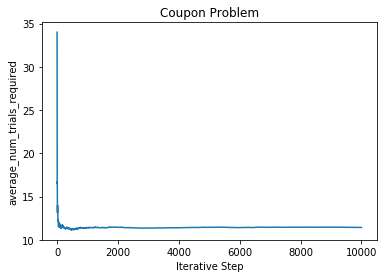

In [4]:
plt.plot(df['iteration'], df['average_num_trials_required'])
plt.title('Coupon Problem') 
plt.xlabel('Iterative Step') 
plt.ylabel('average_num_trials_required') 